In [1]:
import json
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fJsonName_youtube = 'NEW_youtube_olympics_data_limited_250_per_hashtag.json'
with open(fJsonName_youtube, 'r') as f:
    ySubmissions = json.load(f)

flattened_data = []
for post in ySubmissions:
    for comment in post['Comments']:
        flattened_data.append({
            'title': post['Video Title'],
            'text': post['Description'],
            'olympics': post['Hashtag'],
            'video_author': post['Video Tuthor'],
            'Comment Author': comment['author'],
            'Comment Text': comment['text'],
            'Comment Published At': comment['published_at']
            
        })

df_olympics = pd.DataFrame(flattened_data)
df_olympics_copy = df_olympics.copy()

In [3]:
fJsonName_reddit = 'olympics_posts_reddit.json'
with open(fJsonName_reddit, 'r') as f:
    dSubmissions = json.load(f)

flattened_data_reddit = []
for submission in dSubmissions:
    flattened_data_reddit.append({
            'title': submission['title'],
            'text': submission['selftext'],
            'olympics': submission['keyword'],
            'author': submission['author_id'],
            'Published at': submission['created'],
            'type':'post'})
    for comment in submission['comments']:
        flattened_data_reddit.append({
            'title':submission['title'],
            'author': comment['author_id'],
            'text': comment['body'],
            'Published at': comment['created'],
            'olympics': submission['keyword'],
            'type': 'comment'
            
        })

df2_olympics = pd.DataFrame(flattened_data_reddit)

for i in range(len(df2_olympics)):
    df2_olympics['Published at'][i] = datetime.fromtimestamp(df2_olympics['Published at'][i])

df2_olympics_copy = df2_olympics.copy()

In [4]:
def topic_analyse(keyword, time, title, sign, keyword2 = None):
    df = df_olympics[
    df_olympics['title'].str.contains(keyword, case=False, na=False) |
    df_olympics['text'].str.contains(keyword, case=False, na=False) |
    df_olympics['Comment Text'].str.contains(keyword, case=False, na=False)
    ]

    df2 = df2_olympics[
        df2_olympics['title'].str.contains(keyword, case=False, na=False) |
        df2_olympics['text'].str.contains(keyword, case=False, na=False) 
    ]

    df['Comment Published At'] = pd.to_datetime(df['Comment Published At'], utc=True)
    df2['Published at'] = pd.to_datetime(df2['Published at'], utc = True)
    
    # Extract the date of publication
    df['Published Date'] = df['Comment Published At'].dt.date
    df2['Published Date'] = df2['Published at'].dt.date

    if keyword2 == None:
        if sign == 'less':
            df_time = df[df['Comment Published At'] <= time]
            df2_time = df2[df2['Published at'] <= time ]
        else:
            df_time = df[df['Comment Published At'] >= time]
            df2_time = df2[df2['Published at'] >= time ]
    else:
        if sign == 'less':
            df_time = df[(df['Comment Published At'] <= time) & (df['olympics'] == keyword2) ]
            df2_time = df2[df2['Published at'] <= time ]
        else:
            df_time = df[(df['Comment Published At'] >= time) & (df['olympics'] == keyword2) ]
            df2_time = df2[df2['Published at'] >= time ]

    mentions_per_day = df_time.groupby('Published Date').size()
    mentions_per_day2 = df2_time.groupby('Published Date').size()

    combined_two = mentions_per_day.add(mentions_per_day2, fill_value=0)

    # Convert the result to a DataFrame for better display
    combined_df = combined_two.reset_index()
    combined_df.columns = ['Published Date', 'Total Mentions']

    x = combined_df['Published Date']
    y = combined_df['Total Mentions']
    
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('Number of Mention')
    plt.title(title)
    plt.xticks(rotation = 45)
    plt.show()

    
    

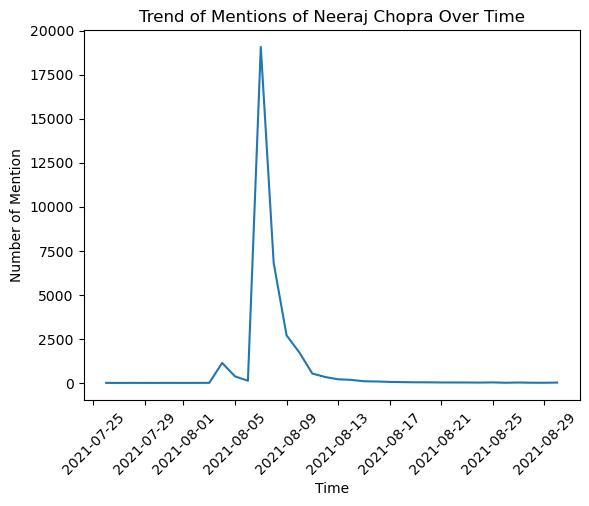

In [5]:
topic_analyse('Neeraj','2021-08-31','Trend of Mentions of Neeraj Chopra Over Time', 'less')

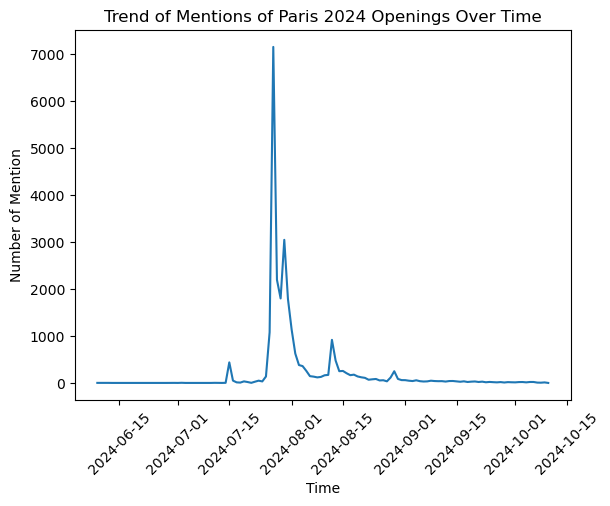

In [6]:
topic_analyse('opening','2024-06-01','Trend of Mentions of Paris 2024 Openings Over Time', 'more','#paris2024')

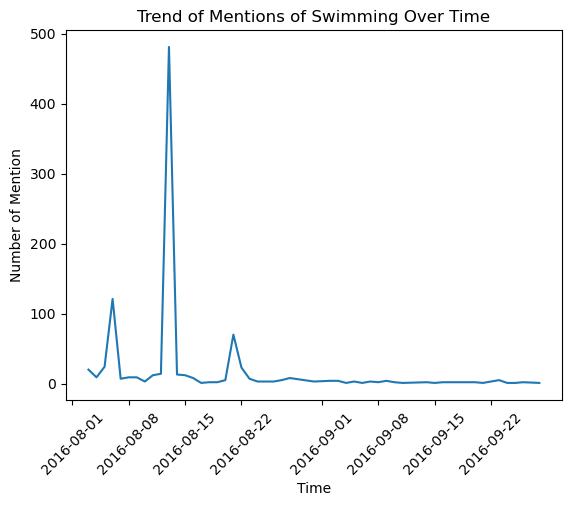

In [7]:
df = df_olympics_copy[
    df_olympics_copy['title'].str.contains('swim', case=False, na=False) |
    df_olympics_copy['text'].str.contains('swim', case=False, na=False) |
    df_olympics_copy['Comment Text'].str.contains('swim', case=False, na=False)
]

df2 = df2_olympics_copy[
    df2_olympics_copy['title'].str.contains('swim', case=False, na=False) |
    df2_olympics_copy['text'].str.contains('swim', case=False, na=False) 
]

df['Comment Published At'] = pd.to_datetime(df['Comment Published At'], utc=True)
df2['Published at'] = pd.to_datetime(df2['Published at'], utc = True)
    
# Extract the date of publication
df['Published Date'] = df['Comment Published At'].dt.date
df2['Published Date'] = df2['Published at'].dt.date

df_time = df[(df['Comment Published At'] >= '2016-08-03') & (df['Comment Published At'] <= '2016-09-30') & (df['olympics'] == '#rio2016') ]
df2_time = df2[(df2['Published at'] >= '2016-08-03') & (df2['Published at'] <= '2016-09-30')]

mentions_per_day = df_time.groupby('Published Date').size()
mentions_per_day2 = df2_time.groupby('Published Date').size()

combined_two = mentions_per_day.add(mentions_per_day2, fill_value=0)

# Convert the result to a DataFrame for better display
combined_df = combined_two.reset_index()
combined_df.columns = ['Published Date', 'Total Mentions']

x = combined_df['Published Date']
y = combined_df['Total Mentions']
    
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Number of Mention')
plt.title('Trend of Mentions of Swimming Over Time')
plt.xticks(rotation = 45)
plt.show()